# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Define Data Path
Data can be downloaded here https://drive.google.com/file/d/10W2Mp83BClIJLW3t-F3KExHOtb0PrrTY/view?usp=sharing

In [ ]:
train_path = "/content/gdrive/MyDrive/DigitalSkola/Dataset/Gender Classification/dataset/train"
test_path  = "/content/gdrive/MyDrive/DigitalSkola/Dataset/Gender Classification/dataset/val"

# Load Dataset and define Batch

In [ ]:
# Define Batch and image size
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Call Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 1170 files belonging to 2 classes.


In [ ]:
# Call Testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 140 files belonging to 2 classes.


# Check Class names

In [ ]:
class_names = train_ds.class_names
print(class_names)

['female', 'male']


In [ ]:
print(test_ds.class_names)

['female', 'male']


# Visualize Sample dataset

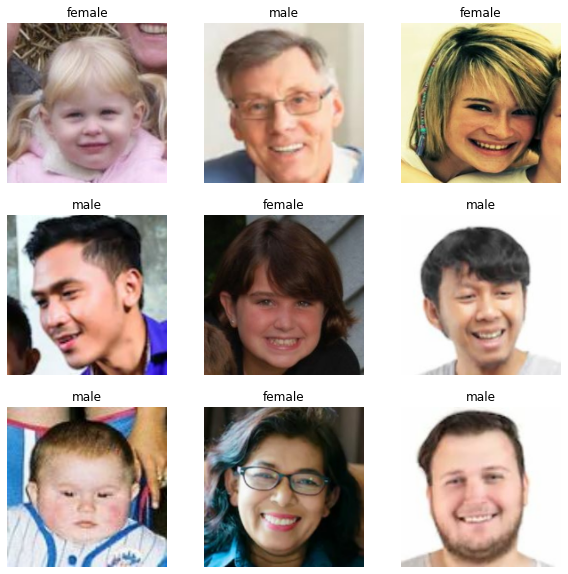

In [ ]:
# Visualize data before training
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Compare batch image with batch label
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Cache dataset to reduce training duration

In [ ]:
# Caching dataset to fasten the training process
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create CNN Model

In [ ]:
# Define Number of classes
num_classes = len(class_names)

In [ ]:
# Create Model
model = Sequential([
    # Mencegah overfit dengan mempermainkan gambar
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # Rescale ukuran dari 0-255 ke 0-1
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional Process
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Berguna untuk mencegah overfit dengan mematikan beberapa filter
    layers.Dropout(0.2),

    # Membuat kumpulan oixel menjadi satu dimensi
    layers.Flatten(),

    # Neural Network layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    # Memprediksi gambar ke sejumlah kelas (male, female)
    layers.Dense(num_classes)
])

In [ ]:
# Compile model dan menentukan pengukuran error
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

In [ ]:
# Mentraining Model dan menyimpan performance model ke dalam variable history
epochs=50
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/50
37/37 [==============================] - 5s 89ms/step - loss: 0.6997 - accuracy: 0.4974 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/50
37/37 [==============================] - 3s 69ms/step - loss: 0.6898 - accuracy: 0.5325 - val_loss: 0.6759 - val_accuracy: 0.5643
Epoch 3/50
37/37 [==============================] - 3s 72ms/step - loss: 0.6665 - accuracy: 0.6060 - val_loss: 0.7333 - val_accuracy: 0.5286
Epoch 4/50
37/37 [==============================] - 3s 71ms/step - loss: 0.6613 - accuracy: 0.6282 - val_loss: 0.6871 - val_accuracy: 0.6214
Epoch 5/50
37/37 [==============================] - 3s 75ms/step - loss: 0.6305 - accuracy: 0.6410 - val_loss: 0.6456 - val_accuracy: 0.6357
Epoch 6/50
37/37 [==============================] - 3s 73ms/step - loss: 0.6142 - accuracy: 0.6538 - val_loss: 0.5938 - val_accuracy: 0.6786
Epoch 7/50
37/37 [==============================] - 3s 76ms/step - loss: 0.6062 - accuracy: 0.6726 - val_loss: 0.6191 - val_accuracy: 0.6357
Epoch 8/50
37

# Visualize Performance

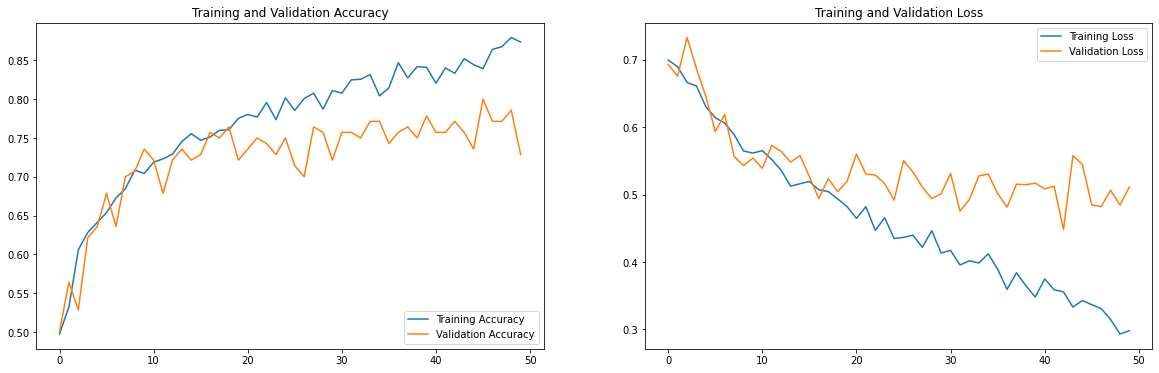

In [ ]:
# Accuracy and Loss Visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

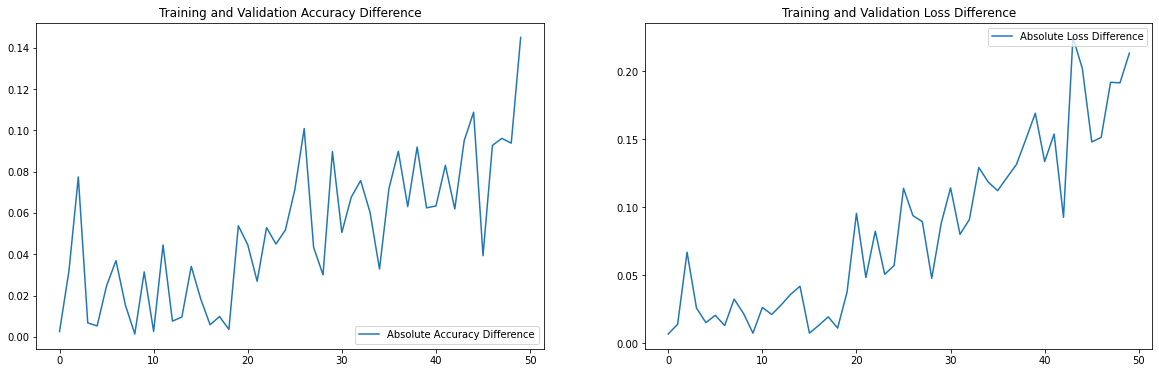

In [ ]:
# The increase of difference trend means that the training tends to overfitting
acc_difference = abs(np.array(acc) - np.array(val_acc))
loss_difference = abs(np.array(loss) - np.array(val_loss))

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_difference, label='Absolute Accuracy Difference')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Difference')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_difference, label='Absolute Loss Difference')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()

# Predict Image

This image most likely belongs to male with a 76.72 percent confidence.


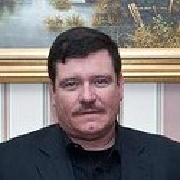

In [ ]:
# Define path of the image
image_path = "/content/gdrive/MyDrive/DigitalSkola/Dataset/Gender Classification/dataset/val/male/1001738864_d4cb853874_1186_40124061@N002.jpg"

# Load Image to tensorflow
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

# Transform image into array
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Predict model
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Prediction Result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Visualize Image
img